In [6]:
class Runner: 

    
    def __init__(self, agent, env):
        self.agent = agent
        self.env = env

    
    def run_simulations(self, horizon, n_runs, draw=False, draw_every=10): 
        # actions are in [0, 1] for simplicity
        for run_i in range(n_runs):
            self.agent.reset()
            self.env.reset(seed=run_i)
            plt.figure()
            cols = 2
            f, ax = plt.subplots(int(horizon/(draw_every)), cols, figsize=(cols*6,horizon/draw_every*4))
            actions = np.zeros((horizon, self.agent.action_dim))
            rewards = np.zeros(horizon)
            plot_count = 0
            for t in tqdm(range(horizon)):
                actions[t, :] = self.agent.pull()
                rewards[t] = self.env.step(actions[t, :])
                self.agent.update(rewards[t])
                if draw and t % draw_every == 0:
                    # int(t/cols), t % cols
                    x_plt, mu, sigma = self.agent.compute()
                    ax[plot_count, 0].plot(x_plt.ravel(), mu)
                    ax[plot_count, 0].plot(x_plt.ravel(), self.env.mean0(x_plt))
                    ax[plot_count, 0].fill_between(x_plt.ravel(), mu-sigma, mu+sigma, alpha=0.3)
                    ax[plot_count, 0].set_title("t = " + str(t+1))
                    ax[plot_count, 0].scatter(actions[:t+1], rewards[:t+1])
                    ax[plot_count, 0].set_xlim([0, 1])
                    ax[plot_count, 0].set_ylim([-0.1, 1.1])
                    ax[plot_count, 1].hist(actions[:t+1], bins=11, alpha=0.1)
                    ax[plot_count, 1].set_xlim([0, 1])
                    for act in np.unique(actions[:t+1]):
                        avg = rewards[:t+1]
                        mask = actions[:t+1] == act
                        avg = np.mean(avg[mask.ravel()])
                        ax[plot_count, 0].scatter(act, avg, color="r")
                    plot_count = plot_count + 1
            """
            fig = plt.figure()
            ax = fig.add_subplot(projection='3d')
            ax.scatter(x_plt[:, 0], x_plt[:, 1], mu, marker="o")
            ax.scatter(x_plt[:, 0], x_plt[:, 1], 
                       self.env.mean0(x_plt[:, 0]) * self.env.mean1(x_plt[:, 1]), marker="x")
            """

  0%|          | 0/200 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

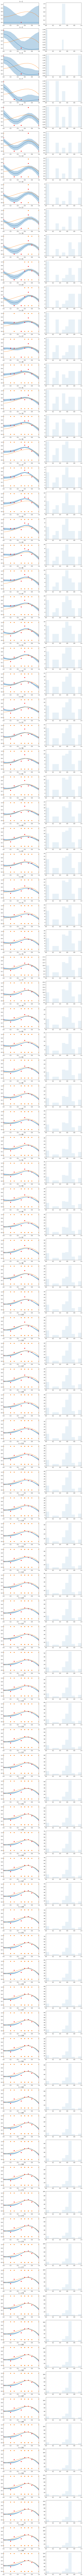

In [7]:
horizon = 200
actions0 = np.linspace(0, 1, 6)
actions1 = np.linspace(0, 1, 6)
actions0, actions1 = np.meshgrid(actions0, actions1)
actions = np.hstack((actions0.ravel().reshape(-1, 1), actions1.ravel().reshape(-1, 1)))

agent = OptimisticKernelizedBanditAgent(horizon=horizon,
        actions=np.linspace(0, 1, 11).reshape(-1, 1))
env2d = BernoulliEnvironmentTwoDims(mean0, mean1)
env1d = BernoulliEnvironmentOneDim(mean0)
runner = Runner(agent, env1d)
runner.run_simulations(horizon=horizon, n_runs=1, draw=True, draw_every=2)